# Part 1 - The network of retweets

In [105]:
import networkx as nx
import numpy as np
import pandas as pd
import re
import io
import matplotlib.pylab as plt
from fa2 import ForceAtlas2
import os
import glob
import community

## Exercise 1

**Exercise 1: Build the network of retweets. We will now build a network that has as nodes the Twitter handles of the members of the house, and direct edges between nodes A and B if A has retweeted content posted by B. We will build a weighted network, where the weight of an edge is equal to the number of retweets.**

In [28]:
df = pd.read_csv('./tweet_names.csv', encoding ='utf-8')

In [23]:
G = nx.DiGraph()

path = './tweets_2019/*'
for filename in glob.glob(path):
    m = filename[14:]
    tweet_name = df.loc[df['WikiPageName']==m]['tw_name'].item()
    party_name = df.loc[df['WikiPageName']==m]['Party'].item()
    G.add_node(tweet_name, party=party_name)
    
    f = io.open('./tweets_2019/'+ m,'r', encoding="utf8", errors='ignore').read()
    retweets = re.findall(r'RT @\w*', f)
    for r in set(retweets):
        count = retweets.count(r)
        r = r[4:]
        if r in df['tw_name'].values:
            if r!=tweet_name:
                G.add_node(r, party=df.loc[df['tw_name']==r]['Party'].item())
                G.add_edge(tweet_name, r, weight=count)
            

C:\Users\s144445\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  
C:\Users\s144445\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `item` has been deprecated and will be removed in a future version
  import sys
C:\Users\s144445\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: `item` has been deprecated and will be removed in a future version


## Exercise 2
**Visualize the network of retweets and investigate differences between the parties.**

**Visualize the network using the Networkx draw function, and nodes coordinates from the force atlas algorithm. Hint: use an undirected version of the graph to find the nodes positions for better results, but stick to the directed version for all measurements. Plot nodes in colors according to their party (e.g. 'red' for republicans and 'blue' for democrats) and set the node-size to be proportional to total degree.**

In [137]:
u_G = G.to_undirected()
Gc = max(nx.connected_component_subgraphs(u_G), key=len)
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=True,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)


In [26]:

dem_nodes = [n for (n,party) in nx.get_node_attributes(Gc,'party').items() if party == 'Democratic']
rep_nodes = [n for (n,party) in nx.get_node_attributes(Gc,'party').items() if party == 'Republican']
d = dict(Gc.degree)
dem_degrees = [(d[node]) * 5 for node in dem_nodes]
rep_degrees = [(d[node]) * 5 for node in rep_nodes]



positions = forceatlas2.forceatlas2_networkx_layout(Gc, pos=None, iterations=5000)

100%|██████████| 5000/5000 [00:24<00:00, 200.02it/s]


BarnesHut Approximation  took  3.38  seconds
Repulsion forces  took  20.20  seconds
Gravitational forces  took  0.15  seconds
Attraction forces  took  0.11  seconds
AdjustSpeedAndApplyForces step  took  0.56  seconds


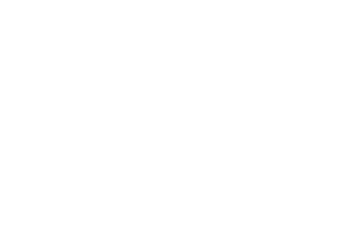

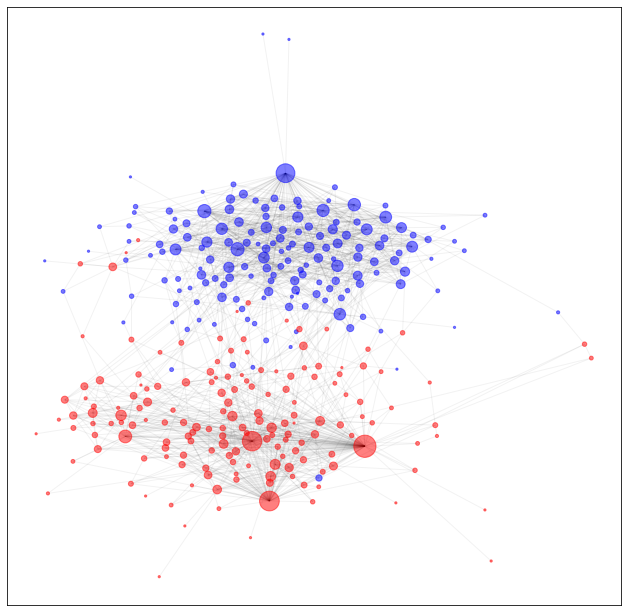

In [32]:
plt.axis('off')
plt.figure(figsize=(11,11)) 
nx.draw_networkx_nodes(Gc, positions, nodelist=dem_nodes,node_color='blue', node_size= dem_degrees, with_labels=False, alpha=0.5)
nx.draw_networkx_nodes(Gc, positions, nodelist=rep_nodes,node_color='red', node_size= rep_degrees, with_labels=False, alpha=0.5)
nx.draw_networkx_edges(Gc, positions, alpha=0.05)

plt.show()

**Compare the network of Retweets with the network of Wikipedia pages (generated during Week 5). Do you observe any differences? How do you explain them?**

Network of wikipedia pages shown below. 

<img src="network_part_5.png" alt="wiki_network" style="width:550px;"/>

It can be seen that the new network of retweets looks much more structured than that of the wikipedia pages as the parties are more separeted. This shows that politicians are much more likely to retweet content from within their own party than of the other party (which is no surprise). In the wikipedia network the edges are built from the links and one page might very well link to pages of the other party for a number of reasons.

**Now set the node-size tob proportional to betweenness centrality. Do you observe any changes?**

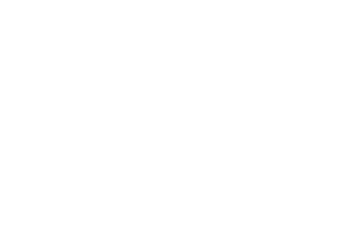

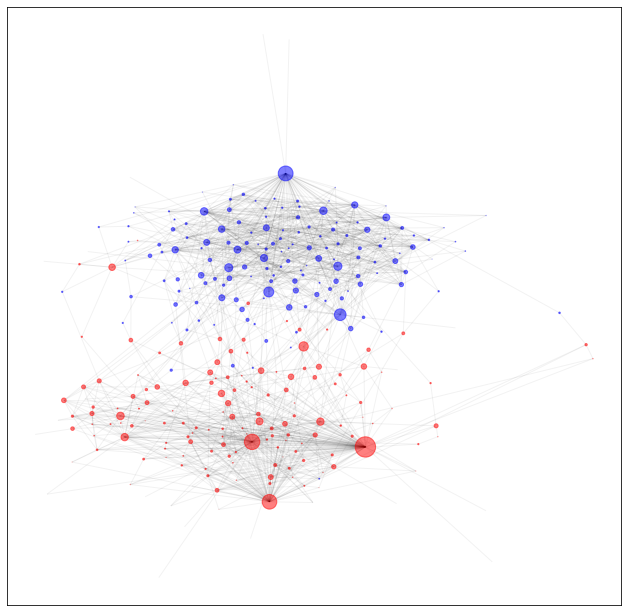

In [38]:
betweeness_centrality = nx.betweenness_centrality(Gc)
dem_betweeness_centrality = [(betweeness_centrality[node]) * 2000 for node in dem_nodes]
rep_betweeness_centrality = [(betweeness_centrality[node]) * 2000 for node in rep_nodes]

plt.axis('off')
plt.figure(figsize=(11,11)) 
nx.draw_networkx_nodes(Gc, positions, nodelist=dem_nodes,node_color='blue', node_size= dem_betweeness_centrality, with_labels=False, alpha=0.5)
nx.draw_networkx_nodes(Gc, positions, nodelist=rep_nodes,node_color='red', node_size= rep_betweeness_centrality, with_labels=False, alpha=0.5)
nx.draw_networkx_edges(Gc, positions, alpha=0.05)

plt.show()

When setting the node size proportional to the betweeness centrality it can be observes that the same nodes are dominating the network, but there is a larger gap between the large nodes and the small nodes. 

**Repeat the point above using eigenvector centrality. Again, do you see a difference? Can you explain why based on what eigenvector centrality measures?**

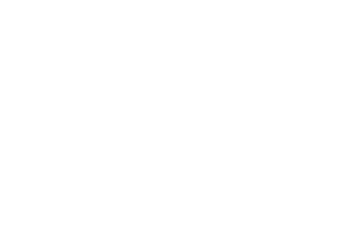

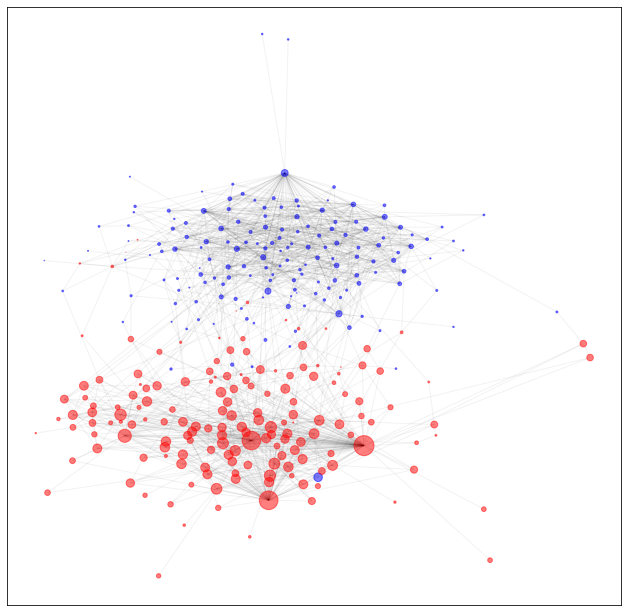

In [41]:
eigenvector_centrality = nx.eigenvector_centrality(Gc)
dem_eigenvector_centrality = [(eigenvector_centrality[node]) * 1000 for node in dem_nodes]
rep_eigenvector_centrality = [(eigenvector_centrality[node]) * 1000 for node in rep_nodes]

plt.axis('off')
plt.figure(figsize=(11,11)) 
nx.draw_networkx_nodes(Gc, positions, nodelist=dem_nodes,node_color='blue', node_size= dem_eigenvector_centrality, with_labels=False, alpha=0.5)
nx.draw_networkx_nodes(Gc, positions, nodelist=rep_nodes,node_color='red', node_size= rep_eigenvector_centrality, with_labels=False, alpha=0.5)
nx.draw_networkx_edges(Gc, positions, alpha=0.05)

plt.show()

Here it can be observed that the democratic nodes are generally larger than the republic nodes. The eigenvector centrality measures the centrality of a node based on the centrality of its neighbours. If a node is connected to many nodes that have a high eigenvector centrality then that node will have high eigenvector centrality. This is an indicator of the influence a node has on the network. 

Looking at the network of betweeness centrality it can be seen that there are multiple larger nodes that are connected among the democratic nodes while this is not as clear with the republic nodes. Because of this there are more nodes in among the democratics with a high eigenvector centrality and more the republic nodes have a lower eigenvector centrality.

**Who are the three nodes with highest degree within each party? And wbat is their eigenvector centrality? And their betweenness centrality?**

In [66]:
def getDegree(n):
    return d[n];

dem_nodes.sort(key=getDegree, reverse=True)
rep_nodes.sort(key=getDegree, reverse=True)
print('Democratic nodes with highest degree:', dem_nodes[0:3])
print('Their betweeness centrality:\n', [x + ': '+ str(betweeness_centrality[x]) for x in dem_nodes[0:3]])
print('Their eigenvector centrality:\n', [x + ': '+ str(eigenvector_centrality[x]) for x in dem_nodes[0:3]])
print('\nRepublic nodes with highest degree:', rep_nodes[0:3])
print('Their betweeness centrality:\n', [x + ': '+ str(betweeness_centrality[x]) for x in rep_nodes[0:3]])
print('Their eigenvector centrality:\n', [x + ': '+ str(eigenvector_centrality[x]) for x in rep_nodes[0:3]])

Democratic nodes with highest degree: ['SpeakerPelosi', 'RepAdamSchiff', 'RepLindaSanchez']
Their betweeness centrality:
 ['SpeakerPelosi: 0.1107544095435179', 'RepAdamSchiff: 0.024552541198748473', 'RepLindaSanchez: 0.028139237471647323']
Their eigenvector centrality:
 ['SpeakerPelosi: 0.04713390580275158', 'RepAdamSchiff: 0.025357844852006935', 'RepLindaSanchez: 0.023464012949745552']

Republic nodes with highest degree: ['GOPLeader', 'RepAndyBiggsAZ', 'SteveScalise']
Their betweeness centrality:
 ['GOPLeader: 0.20714511180888248', 'RepAndyBiggsAZ: 0.10754803501029049', 'SteveScalise: 0.11944144873581099']
Their eigenvector centrality:
 ['GOPLeader: 0.3991932006433883', 'RepAndyBiggsAZ: 0.35002973571849577', 'SteveScalise: 0.34643003672309614']


**Plot (on the same figure) the distribution of outgoing strength for the republican and democratic nodes repectively (i.e. the sum of the weight on outgoing links). Which party is more active in retweeting other members of the house?**

In [93]:
total_retweets = {'Republican': 0, 'Democratic': 0}
for filename in glob.glob(path):
    m = filename[14:]
    tweet_name = df.loc[df['WikiPageName']==m]['tw_name'].item()
    party_name = df.loc[df['WikiPageName']==m]['Party'].item()
    
    f = io.open('./tweets_2019/'+ m,'r', encoding="utf8", errors='ignore').read()
    retweets = re.findall(r'RT @\w*', f)
    for r in set(retweets):
        r = r[4:]
        if r in df['tw_name'].values:
            if r!=tweet_name:
                total_retweets[party_name] +=1

C:\Users\s144445\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `item` has been deprecated and will be removed in a future version
  after removing the cwd from sys.path.
C:\Users\s144445\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """


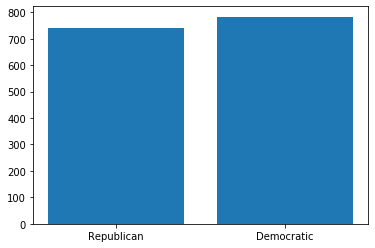

In [94]:

plt.bar(range(len(total_retweets)), list(total_retweets.values()), align='center')
plt.xticks(range(len(total_retweets)), list(total_retweets.keys()))
plt.show()

It can be seen on the plot that the democratic retweet more than the republic party.

**Find the 3 members of the republican party that have retweeted tweets from democratic members most often. Repeat the measure for the democratic members. Can you explain your results by looking at the Wikipedia pages of these members of the house?**

In [103]:
retweets_from_other_party = {'Republican': {}, 'Democratic': {}}
for filename in glob.glob(path):
    m = filename[14:]
    tweet_name = df.loc[df['WikiPageName']==m]['tw_name'].item()
    party_name = df.loc[df['WikiPageName']==m]['Party'].item()
    retweets_from_other_party[party_name][tweet_name] = 0
    
    f = io.open('./tweets_2019/'+ m,'r', encoding="utf8", errors='ignore').read()
    retweets = re.findall(r'RT @\w*', f)
    for r in set(retweets):
        r = r[4:]
        if r in df['tw_name'].values:
            other_party = df.loc[df['tw_name']==r]['Party'].item()
            if party_name != other_party:
                retweets_from_other_party[party_name][tweet_name] +=1
rep_list = sorted(retweets_from_other_party['Republican'], key=retweets_from_other_party['Republican'].get, reverse=True)
rep_name_list = [df.loc[df['tw_name']==x]['WikiPageName'].item() for x in rep_list]
print('Republicans that retweeted democratics most:', rep_name_list[0:3])
dem_list = sorted(retweets_from_other_party['Democratic'], key=retweets_from_other_party['Democratic'].get, reverse=True)
dem_name_list = [df.loc[df['tw_name']==x]['WikiPageName'].item() for x in dem_list]
print('Democratics that retweeted republicans most:', dem_name_list[0:3])

C:\Users\s144445\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `item` has been deprecated and will be removed in a future version
  after removing the cwd from sys.path.
C:\Users\s144445\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """
C:\Users\s144445\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `item` has been deprecated and will be removed in a future version
  del sys.path[0]
C:\Users\s144445\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: `item` has been deprecated and will be removed in a future version


Republicans that retweeted democratics most: ['Brian_Fitzpatrick_(American_politician)', 'Fred_Upton', 'Jim_Sensenbrenner']


C:\Users\s144445\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `item` has been deprecated and will be removed in a future version


Democratics that retweeted republicans most: ['Cedric_Richmond', 'Gene_Green', 'Ted_Deutch']


Brian Fitzpatrick was ranked the third most bipartisan member of the House of Representatives. 

TODO

## Exercise 3: Community detection
**Use your favorite method of community detection to find communities in the full house of representatives network. Report the value of modularity found by the algorithm. Is it higher or lower than what you found for the Wikipedia network (Week 7)? Comment on your result.**

In [110]:
partition = community.best_partition(Gc)
print('Modularity:', community.modularity(partition, Gc))


Modularity: 0.48411196152561853


Modularity in wikipedia network: 0.511538585943077

TODO explain

**Visualize the network, using the Force Atlas algorithm. This time assign each node a different color based on their community. Describe the structure you observe.**

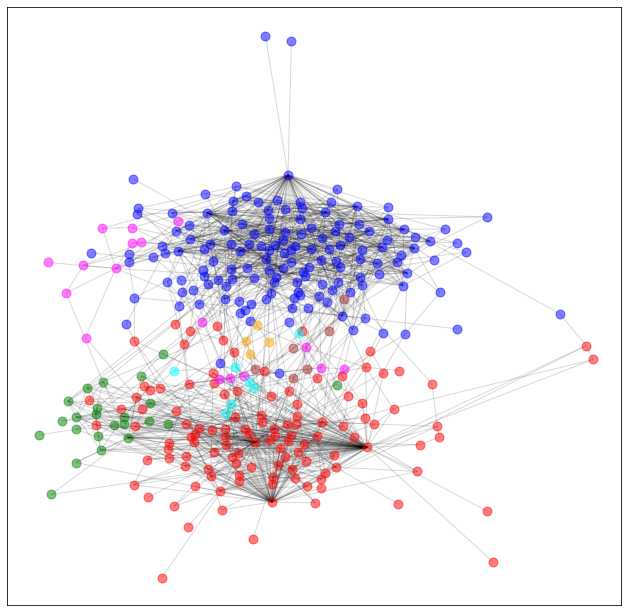

In [151]:
plt.figure(figsize=(11,11)) 


p0= list(dict(filter(lambda x: x[1] == 0, partition.items())).keys())
p1= list(dict(filter(lambda x: x[1] == 1, partition.items())).keys())
p2= list(dict(filter(lambda x: x[1] == 2, partition.items())).keys())
p3= list(dict(filter(lambda x: x[1] == 3, partition.items())).keys())
p4= list(dict(filter(lambda x: x[1] == 4, partition.items())).keys())
p5= list(dict(filter(lambda x: x[1] == 5, partition.items())).keys())
p6= list(dict(filter(lambda x: x[1] == 6, partition.items())).keys())


nx.draw_networkx_nodes(Gc, positions, nodelist=p0,node_color='red', node_size= 80, with_labels=False, alpha=0.5)
nx.draw_networkx_nodes(Gc, positions, nodelist=p1,node_color='blue', node_size= 80, with_labels=False, alpha=0.5)
nx.draw_networkx_nodes(Gc, positions, nodelist=p2,node_color='brown', node_size= 80, with_labels=False, alpha=0.5)
nx.draw_networkx_nodes(Gc, positions, nodelist=p3,node_color='orange', node_size= 80, with_labels=False, alpha=0.5)
nx.draw_networkx_nodes(Gc, positions, nodelist=p4,node_color='green', node_size= 80, with_labels=False, alpha=0.5)
nx.draw_networkx_nodes(Gc, positions, nodelist=p5,node_color='magenta', node_size= 80, with_labels=False, alpha=0.5)
nx.draw_networkx_nodes(Gc, positions, nodelist=p6,node_color='Aqua', node_size= 80, with_labels=False, alpha=0.5)
nx.draw_networkx_edges(Gc, positions, alpha=0.05)
nx.draw_networkx_edges(Gc,positions, alpha=0.1)
plt.show()

It can be observed that the largets communities are those of the party. But there is one community among the republican nodes and a few community that are a mix of the two parties. 

**Compare the communities found by your algorithm with the parties by creating a matrix $\mathbf{D}$ with dimension $(B \times C$, where $B$ is the number of parties and $C$ is the number of communities. We set entry $D(i,j)$ to be the number of nodes that party $i$ has in common with community $j$. The matrix $\mathbf{D}$ is what we call a confusion matrix.**

In [181]:
B=2
C=len(set(partition.values()))
confusion_matrix=np.zeros( (B, C) )
confusion_matrix[0][0] = len(list(set(dem_nodes).intersection(p0)))
confusion_matrix[0][1] = len(list(set(dem_nodes).intersection(p1)))
confusion_matrix[0][2] = len(list(set(dem_nodes).intersection(p2)))
confusion_matrix[0][3] = len(list(set(dem_nodes).intersection(p3)))
confusion_matrix[0][4] = len(list(set(dem_nodes).intersection(p4)))
confusion_matrix[0][5] = len(list(set(dem_nodes).intersection(p5)))
confusion_matrix[0][6] = len(list(set(dem_nodes).intersection(p6)))

confusion_matrix[1][0] = len(list(set(rep_nodes).intersection(p0)))
confusion_matrix[1][1] = len(list(set(rep_nodes).intersection(p1)))
confusion_matrix[1][2] = len(list(set(rep_nodes).intersection(p2)))
confusion_matrix[1][3] = len(list(set(rep_nodes).intersection(p3)))
confusion_matrix[1][4] = len(list(set(rep_nodes).intersection(p4)))
confusion_matrix[1][5] = len(list(set(rep_nodes).intersection(p5)))
confusion_matrix[1][6] = len(list(set(rep_nodes).intersection(p6)))

print(confusion_matrix)
    

[[  5. 140.   3.   2.   0.   7.   3.]
 [113.   7.   3.   2.  23.  10.   4.]]
